<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.3: Measurements

Building upon the forward feature selection technique, we apply it to the diabetes dataset. By iterating over the entire dataset, we identify the subset of features that yield the best adjusted R-squared score. Furthermore, we visualise the results by plotting the R-squared and adjusted R-squared values, providing insights into the model's performance with different feature combinations.

In [12]:
## Import Libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [13]:
## Load the Diabetes Housing dataset

# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [14]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [15]:
print(type(diabetes))

<class 'sklearn.utils._bunch.Bunch'>


In [16]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [17]:
# Target
y = diabetes.target

In [18]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [19]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [24]:

from sklearn.metrics import r2_score

# Assuming X_train and y_train are your training data features and target variable

# Start with no predictors
included = []
# Keep track of the best model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# Create a model object to hold the modelling parameters
model = LinearRegression()
# Get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

# Function to calculate adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Get the list of all predictors
predictors = list(X_train.columns)

# Forward feature selection process
while len(predictors) > 0:
    remaining_predictors = list(set(predictors) - set(included))
    results = []
    
    for predictor in remaining_predictors:
        # Fit the model with the current set of included features plus the new predictor
        X = X_train[included + [predictor]]
        model.fit(X, y_train)
        y_pred = model.predict(X)
        
        # Calculate R-squared and adjusted R-squared
        r2 = r2_score(y_train, y_pred)
        a_r2 = adjusted_r2(r2, n, len(included) + 1)
        
        # Append the results
        results.append((predictor, r2, a_r2))
    
    # Find the best predictor based on adjusted R-squared
    results.sort(key=lambda x: x[2], reverse=True)
    best_predictor, best_r2, best_a_r2 = results[0]
    
    # If the best adjusted R-squared is better than the previous, include the feature
    if best_a_r2 > best['a_r2']:
        included.append(best_predictor)
        best['feature'] = best_predictor
        best['r2'] = best_r2
        best['a_r2'] = best_a_r2
        r2_list.append(best_r2)
        adjusted_r2_list.append(best_a_r2)
        predictors.remove(best_predictor)
    else:
        break

print("Selected features:", included)
print("R-squared values:", r2_list)
print("Adjusted R-squared values:", adjusted_r2_list)


Selected features: ['bmi', 's5', 'bp', 's1', 's2', 'sex', 's4']
R-squared values: [0.3657241273794126, 0.4583441422501079, 0.4831394939699334, 0.49909496202801895, 0.5088160686571606, 0.5234558154751088, 0.5260093076371375]
Adjusted R-squared values: [0.3639170736112628, 0.45524896592010855, 0.47869656698400165, 0.4933374328559271, 0.5017384903957364, 0.515192043489128, 0.5163921051833983]


<>:9: SyntaxWarning: invalid escape sequence '\:'
<>:9: SyntaxWarning: invalid escape sequence '\:'
/var/folders/jk/x0srxcqj6mx0vmvp43lqpm2c6bm373/T/ipykernel_10102/1021397373.py:9: SyntaxWarning: invalid escape sequence '\:'
  plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')


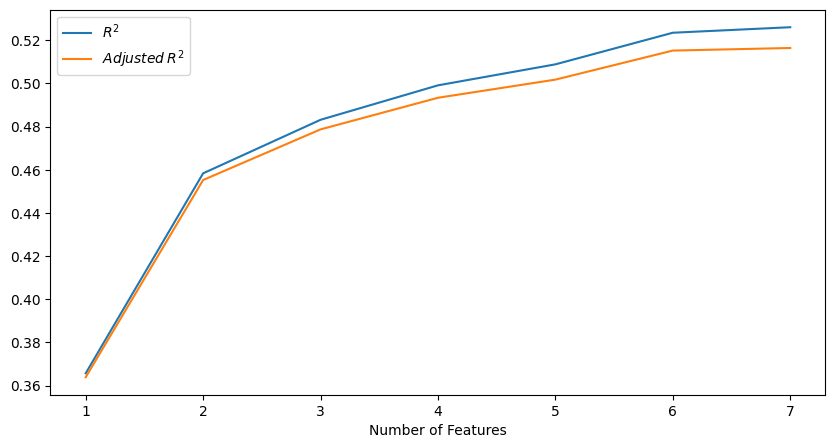

In [25]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



